In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
sns.set()


In [104]:
df1 = pd.read_csv('dataolx2.csv', index_col=0)

df1.describe()

,ID,Harga
count,9.442000e+03,9.442000e+03
mean,5.351011e+08,1.460839e+08
std,3.706530e+06,2.235108e+08
min,4.500650e+08,5.000000e+06
25%,5.348727e+08,6.500000e+07
50%,5.356166e+08,1.020000e+08
75%,5.363149e+08,1.470000e+08
max,5.368859e+08,4.400000e+09


In [105]:
# Remove the duplicated ID, there are more than 1000 ads those have similar ID but different URL
df2 = df1.drop_duplicates('ID').copy()


In [106]:
df2.describe()

,ID,Harga
count,8.240000e+03,8.240000e+03
mean,5.353599e+08,1.356545e+08
std,2.715431e+06,2.018398e+08
min,4.500650e+08,5.000000e+06
25%,5.349897e+08,6.000000e+07
50%,5.356570e+08,9.600000e+07
75%,5.363340e+08,1.400000e+08
max,5.368859e+08,4.400000e+09


<h3>Model

In [107]:
# Index that has nan in model column  = Int64Index([1663, 3996, 4481, 5711, 8112], dtype='int64'), total 5 index

# index 1663
df2.loc[1663, 'Model'] = 'Serena'

# index 3966, drop bcs it is a broken Car
df2.drop([3966], inplace=True)

# index 4481
df2.loc[4481,'Model'] = 'Pajero'

# index 5711
df2.loc[5711, 'Model'] = 'Ertiga'

# index 8112
df2.loc[8112, 'Model'] = 'Phanter'

In [108]:
df2.Model.isnull().sum()

0

<h3> Brand

In [109]:
# 117 rows have Brand 'Lain-lain'

print(df2.Brand.value_counts()[df2.Brand.value_counts()>100])

nomer =1
for i in df2.URL[df2.Brand == 'Lain-lain']:
    print(nomer, i)
    nomer +=1

Suzuki       5441
Hyundai       714
Truk          595
Toyota        220
Lexus         212
Honda         180
Timor         139
Peugeot       124
Lain-lain     117
Name: Brand, dtype: int64
1 https://www.olx.co.id/iklan/holden-kingswood-hj-IDAkIl6.html?ad_type=OR#8742f4b6b0
2 https://www.olx.co.id/iklan/buldozer-dozer-komatsu-d65-IDzXXbv.html?ad_type=HL#237034b720;promoted
3 https://www.olx.co.id/iklan/daihatsu-sigra-1-2-rdelux-2016-IDAkF43.html?ad_type=OR#c42caa8f30
4 https://www.olx.co.id/iklan/mobil-agya-1-0-g-at-2015-IDAkEix.html?ad_type=OR#3078d8d8c8
5 https://www.olx.co.id/iklan/forklif-yale-2-5-ton-IDAk28J.html?ad_type=OR#cfff677753
6 https://www.olx.co.id/iklan/mobil-tahun-1980-siap-jalan-IDAjUIV.html?ad_type=OR#13a4c43f4d
7 https://www.olx.co.id/iklan/john-deere-cx-gator-IDAjTwe.html?ad_type=OR#4a2a777752
8 https://www.olx.co.id/iklan/hijet-tahn-1984-IDAjKpl.html?ad_type=OR#11c962f242
9 https://www.olx.co.id/iklan/kijang-kapsul-jumbo-komplit-IDAjFF0.html?ad_type=OR#e61c6074bf
10

In [110]:
listnanbrand = ['Holden', np.nan, 'Daihatsu', 'Toyota', np.nan, np.nan, np.nan, 'Daihatsu', 'Toyota',  'Toyota', 'Nissan',
               'Toyota', np.nan, 'Nissan', 'Toyota', 'Daihatsu', np.nan, 'Toyota', 'Kia', 'Daihatsu', np.nan, 'Isuzu', np.nan,
               np.nan, 'Tata', np.nan, 'Daihatsu', 'Mitsubishi', np.nan, np.nan, 'Jeep', 'Tesla', 'Honda', 'Honda', 'Kia', np.nan,
               'Suzuki', 'Nissan', 'Volvo', 'Toyota', 'Isuzu', 'Isuzu', np.nan, 'Daihatsu', 'Daihatsu', np.nan, 'Honda', np.nan,
               'Isuzu', 'Kia', 'Toyota', np.nan, 'Honda', 'Volvo', np.nan, 'Toyota', 'Toyota', 'Volvo', 'Range Rover', np.nan, 
               'Mitsubishi', 'Suzuki', np.nan, np.nan, 'Toyota', 'Daihatsu', np.nan, 'Toyota', 'Daihatsu', 'Suzuki', 'Toyota', 
               np.nan, np.nan, 'Daihatsu', np.nan, 'Daihatsu' , 'Jeep', np.nan, 'Chery', np.nan, 'Suzuki', 'Daihatsu', np.nan, 'Tesla', 'Toyota',
               'Volvo', 'Toyota', 'Toyota', 'Toyota', 'Toyota', 'Toyota', 'Toyota', 'Honda', 'Toyota', 'Toyota', 'Toyota', 'Isuzu',
               np.nan, 'Toyota', 'Toyota', np.nan, 'Daihatsu', np.nan, np.nan, 'Daihatsu', 'Toyota', 'Hyundai', 'Daihatsu', 'Toyota',
               np.nan, 'Volvo', 'Suzuki', np.nan, np.nan, np.nan, 'Nissan', np.nan ]

df2.loc[df2.Brand == 'Lain-lain', 'Brand'] = listnanbrand

df2.loc[3485, 'Brand'] = 'Toyota'

In [111]:
df2.dropna(subset=['Brand'], inplace=True)

<h3>Varian

In [112]:
# drop columns Varian, we dont need detail varian
df2.drop(columns='Varian',inplace=True)
print(df2.isnull().sum())


ID                      0
Brand                   0
Harga                   0
Model                   0
Tahun                   0
Transmisi               1
Tipe bahan bakar        1
Jarak tempuh            0
Warna                   1
Tipe body            2060
Kapasitas mesin      2122
Sistem Penggerak     2924
Tipe Penjual         2379
Nama Bursa Mobil     7951
URL                     0
Fitur tambahan       4080
Kadaluwarsa Pajak    4070
dtype: int64


<h3>Transmisi

In [113]:
# index 8225

df2.loc[8225, 'Transmisi'] = df2['Transmisi'][(df2['Model'] == 'Ignis')].mode().values

In [114]:
df2.isnull().sum()

ID                      0
Brand                   0
Harga                   0
Model                   0
Tahun                   0
Transmisi               0
Tipe bahan bakar        1
Jarak tempuh            0
Warna                   1
Tipe body            2060
Kapasitas mesin      2122
Sistem Penggerak     2924
Tipe Penjual         2379
Nama Bursa Mobil     7951
URL                     0
Fitur tambahan       4080
Kadaluwarsa Pajak    4070
dtype: int64

In [115]:
df2.loc[df2.Transmisi == 'Automatic Triptonic', 'Transmisi'] = 'Automatic'

<h3>Tipe Bahan Bakar

In [116]:
df2[df2['Tipe bahan bakar'].isnull()]
# index 8225

df2.loc[8225,'Tipe bahan bakar'] = 'Bensin'
df2.isnull().sum()

ID                      0
Brand                   0
Harga                   0
Model                   0
Tahun                   0
Transmisi               0
Tipe bahan bakar        0
Jarak tempuh            0
Warna                   1
Tipe body            2060
Kapasitas mesin      2122
Sistem Penggerak     2924
Tipe Penjual         2379
Nama Bursa Mobil     7951
URL                     0
Fitur tambahan       4080
Kadaluwarsa Pajak    4070
dtype: int64

<h3>Warna

In [117]:
print(df2['Model'][df2['Warna'].isnull()].index[0])

df2.loc[df2['Model'][df2['Warna'].isnull()].index[0], 'Warna'] = df2['Warna'][(df2['Model'] == df2['Model'][df2['Warna'].isnull()].values[0])].mode().values[0]

df2.isnull().sum()


8225


ID                      0
Brand                   0
Harga                   0
Model                   0
Tahun                   0
Transmisi               0
Tipe bahan bakar        0
Jarak tempuh            0
Warna                   0
Tipe body            2060
Kapasitas mesin      2122
Sistem Penggerak     2924
Tipe Penjual         2379
Nama Bursa Mobil     7951
URL                     0
Fitur tambahan       4080
Kadaluwarsa Pajak    4070
dtype: int64

<h3>Tipe Body

In [118]:
a = df2[['Model', 'Tipe body']][df2['Tipe body'].isnull()].index
b = df2['Model'][df2['Tipe body'].isnull()].values

listbody = []

for i in b:
    try :
        listbody.append(df2['Tipe body'][df2['Model'] == i].mode()[0])
    except:
        listbody.append(np.nan)

df2.loc[a,'Tipe body'] = listbody

In [119]:
print(df2['Tipe body'].unique())

# check the model still has Nan in 'Tipe body' column
print(df2[['Brand','Model','Tipe body']][df2['Tipe body'].isnull()])

# fill in size category
sedan = ['Ghibli', 'ES' ]
compact = ['107', 'Starlet']
MPV = ['Voxy', 'Maven', 'Grandis', 'CX-9', 'Allroad' ]
Minibus = ['Caravelle', 'Grand touring', 'Tribute']


df2.loc[df2['Model'].isin(sedan), 'Tipe body'] = 'Sedan'
df2.loc[df2['Model'].isin(compact), 'Tipe body'] = 'Compact & City Car'
df2.loc[df2['Model'].isin(MPV), 'Tipe body'] = 'MPV'
df2.loc[df2['Model'].isin(Minibus), 'Tipe body'] = 'Minibus'

df2.isnull().sum()

['SUV' 'MPV' 'Sedan' 'Compact & City Car' 'Hatchback' 'Minibus' 'Van'
 'Truk' 'Jeep' nan 'Wagon' 'Pick-up' 'Coupe' 'Bus' 'Sports & Super Car'
 'Offroad' 'Double Cabin' 'Classic Car' 'Convertible']
           Brand          Model Tipe body
47    Volkswagen      Caravelle       NaN
353       Toyota        Starlet       NaN
519     Maserati         Ghibli       NaN
600   Mitsubishi          Maven       NaN
739        Mazda        Tribute       NaN
773       Toyota           Voxy       NaN
902        Isuzu  Grand touring       NaN
1021       Mazda           CX-9       NaN
1814       Lexus             ES       NaN
3445  Mitsubishi        Grandis       NaN
3815     Peugeot            107       NaN
5852       Lexus             ES       NaN
8331       Lexus             ES       NaN
8623        Audi        Allroad       NaN


ID                      0
Brand                   0
Harga                   0
Model                   0
Tahun                   0
Transmisi               0
Tipe bahan bakar        0
Jarak tempuh            0
Warna                   0
Tipe body               0
Kapasitas mesin      2122
Sistem Penggerak     2924
Tipe Penjual         2379
Nama Bursa Mobil     7951
URL                     0
Fitur tambahan       4080
Kadaluwarsa Pajak    4070
dtype: int64

<h3> Kapasitas Mesin

In [120]:
indexcc = df2[['Model', 'Kapasitas mesin']][df2['Kapasitas mesin'].isnull()].index
modelcc = df2['Model'][df2['Kapasitas mesin'].isnull()].values

listcc = []

for i in modelcc:
    try :
        listcc.append(df2['Kapasitas mesin'][df2['Model'] == i].mode()[0])
    except:
        listcc.append(np.nan)
        
df2.loc[indexcc, 'Kapasitas mesin'] = listcc
df2.isnull().sum()

ID                      0
Brand                   0
Harga                   0
Model                   0
Tahun                   0
Transmisi               0
Tipe bahan bakar        0
Jarak tempuh            0
Warna                   0
Tipe body               0
Kapasitas mesin        16
Sistem Penggerak     2924
Tipe Penjual         2379
Nama Bursa Mobil     7951
URL                     0
Fitur tambahan       4080
Kadaluwarsa Pajak    4070
dtype: int64

In [121]:
print(df2['Kapasitas mesin'].unique())
print(df2[['Brand', 'Model']][df2['Kapasitas mesin'].isnull()])

listccnan = ['>1.500 - 2.000 cc', '≤1.000 - 1.500 cc', '≤1.000 - 1.500 cc', '≤1.000 - 1.500 cc', '>2.000 - 3.000 cc', '≤1.000 - 1.500 cc',
            '>1.500 - 2.000 cc', '>2.000 - 3.000 cc', '>1.500 - 2.000 cc', '>2.000 - 3.000 cc', '>2.000 - 3.000 cc',
            '>2.000 - 3.000 cc', '≤1.000 - 1.500 cc', '>1.500 - 2.000 cc', '>1.500 - 2.000 cc', '>2.000 - 3.000 cc']

df2.loc[df2[df2['Kapasitas mesin'].isnull()].index, 'Kapasitas mesin'] = listccnan

df2.isnull().sum()

['>2.000 - 3.000 cc' '≤1.000 - 1.500 cc' '>1.500 - 2.000 cc' '<1.000 cc'
 '> 3.000 cc' nan]
           Brand          Model
47    Volkswagen      Caravelle
353       Toyota        Starlet
412       Datsun             Go
504       Datsun             Go
519     Maserati         Ghibli
600   Mitsubishi          Maven
682        Honda         Estilo
739        Mazda        Tribute
773       Toyota           Voxy
902        Isuzu  Grand touring
1021       Mazda           CX-9
3445  Mitsubishi        Grandis
3815     Peugeot            107
4097       Lexus          CT200
7293       Lexus          CT200
8623        Audi        Allroad


ID                      0
Brand                   0
Harga                   0
Model                   0
Tahun                   0
Transmisi               0
Tipe bahan bakar        0
Jarak tempuh            0
Warna                   0
Tipe body               0
Kapasitas mesin         0
Sistem Penggerak     2924
Tipe Penjual         2379
Nama Bursa Mobil     7951
URL                     0
Fitur tambahan       4080
Kadaluwarsa Pajak    4070
dtype: int64

<h3>Sistem Penggerak

In [122]:
indexpeng = df2[['Model', 'Sistem Penggerak']][df2['Sistem Penggerak'].isnull()].index
modelpeng = df2['Model'][df2['Sistem Penggerak'].isnull()].values

def sp(i) :
    try:
        return df2['Sistem Penggerak'][df2['Model'] == i].mode()[0]
    except:
        return np.nan
    
df2.loc[indexpeng, 'Sistem Penggerak'] = df2['Model'][df2['Sistem Penggerak'].isnull()].apply(sp)


df2.isnull().sum()

ID                      0
Brand                   0
Harga                   0
Model                   0
Tahun                   0
Transmisi               0
Tipe bahan bakar        0
Jarak tempuh            0
Warna                   0
Tipe body               0
Kapasitas mesin         0
Sistem Penggerak       35
Tipe Penjual         2379
Nama Bursa Mobil     7951
URL                     0
Fitur tambahan       4080
Kadaluwarsa Pajak    4070
dtype: int64

In [123]:
df2[['Brand','Model', 'Tahun']][df2['Sistem Penggerak'].isnull()]

,Brand,Model,Tahun
47,Volkswagen,Caravelle,2005
102,Toyota,HILUX,2008
156,Volkswagen,Kodok,<1986
353,Toyota,Starlet,1994
412,Datsun,Go,2017
438,Daihatsu,Winner,2012
457,Mazda,5,2007
504,Datsun,Go,2016
519,Maserati,Ghibli,2016
600,Mitsubishi,Maven,2008


In [124]:
df2['Sistem Penggerak'].unique()
# array(['4X2', 'Front Wheel Drive (FWD)', 'Rear Wheel Drive (RWD)', '4X4',
#        nan, 'All Wheel Drive (AWD)'], dtype=object)

listpengnan = ['4X4', '4X4', 'Rear Wheel Drive (RWD)', 'Front Wheel Drive (FWD)', 'Front Wheel Drive (FWD)', 'Front Wheel Drive (FWD)',
              'Front Wheel Drive (FWD)', 'Front Wheel Drive (FWD)', 'Rear Wheel Drive (RWD)', 'Front Wheel Drive (FWD)',
              'Front Wheel Drive (FWD)','Rear Wheel Drive (RWD)','Rear Wheel Drive (RWD)','Rear Wheel Drive (RWD)', 'Front Wheel Drive (FWD)', 'Front Wheel Drive (FWD)', 'Rear Wheel Drive (RWD)',
              'Rear Wheel Drive (RWD)','Rear Wheel Drive (RWD)', 'Rear Wheel Drive (RWD)', 'Front Wheel Drive (FWD)', 'Front Wheel Drive (FWD)', 'Rear Wheel Drive (RWD)', 'Front Wheel Drive (FWD)',
              'Rear Wheel Drive (RWD)','Rear Wheel Drive (RWD)','Rear Wheel Drive (RWD)', 'Rear Wheel Drive (RWD)', 'Front Wheel Drive (FWD)', 'Rear Wheel Drive (RWD)', 'Front Wheel Drive (FWD)', 
              'Rear Wheel Drive (RWD)', 'Front Wheel Drive (FWD)', 'Front Wheel Drive (FWD)', '4X4']

df2.loc[df2['Sistem Penggerak'].isnull(), 'Sistem Penggerak'] = listpengnan

df2.isnull().sum()

ID                      0
Brand                   0
Harga                   0
Model                   0
Tahun                   0
Transmisi               0
Tipe bahan bakar        0
Jarak tempuh            0
Warna                   0
Tipe body               0
Kapasitas mesin         0
Sistem Penggerak        0
Tipe Penjual         2379
Nama Bursa Mobil     7951
URL                     0
Fitur tambahan       4080
Kadaluwarsa Pajak    4070
dtype: int64

<h3> Tahun

In [125]:
df2.loc[df2['Tahun']== '<1986', 'Tahun'] = 1980

df2.loc[:,'Tahun'] = df2['Tahun'].astype('int32')

df2.describe()



,ID,Harga,Tahun
count,8.202000e+03,8.202000e+03,8202.000000
mean,5.353602e+08,1.354537e+08,2008.557791
std,2.720377e+06,2.015058e+08,8.289049
min,4.500650e+08,5.000000e+06,1980.000000
25%,5.349905e+08,6.000000e+07,2004.000000
50%,5.356573e+08,9.600000e+07,2011.000000
75%,5.363346e+08,1.400000e+08,2015.000000
max,5.368859e+08,4.400000e+09,2019.000000


<h3>Harga

In [126]:
#Remove the outlier (broken car, and motercycle)    
df2.drop(list(df2[df2.Harga == df2.Harga.min()].index), inplace=True)

print(df2.describe())

#Remove the outlier (broken car) 
df2.drop(list(df2[df2.Harga == df2.Harga.min()].index), inplace=True)

df2.describe()

                 ID         Harga        Tahun
count  8.201000e+03  8.201000e+03  8201.000000
mean   5.353602e+08  1.354696e+08  2008.557005
std    2.720542e+06  2.015130e+08     8.289250
min    4.500650e+08  7.000000e+06  1980.000000
25%    5.349905e+08  6.000000e+07  2004.000000
50%    5.356573e+08  9.600000e+07  2011.000000
75%    5.363347e+08  1.400000e+08  2015.000000
max    5.368859e+08  4.400000e+09  2019.000000


,ID,Harga,Tahun
count,8.200000e+03,8.200000e+03,8200.000000
mean,5.353603e+08,1.354853e+08,2008.559634
std,2.720696e+06,2.015203e+08,8.286335
min,4.500650e+08,8.000000e+06,1980.000000
25%,5.349906e+08,6.000000e+07,2004.000000
50%,5.356578e+08,9.600000e+07,2011.000000
75%,5.363347e+08,1.400000e+08,2015.000000
max,5.368859e+08,4.400000e+09,2019.000000


In [127]:
column = df2.columns
print(column)
print(df2[df2.Harga == df2.Harga.min()])

# drop index 229 bcs it is not a Car, but only container
df2.drop(229, inplace=True)


Index(['ID', 'Brand', 'Harga', 'Model', 'Tahun', 'Transmisi',
       'Tipe bahan bakar', 'Jarak tempuh', 'Warna', 'Tipe body',
       'Kapasitas mesin', 'Sistem Penggerak', 'Tipe Penjual',
       'Nama Bursa Mobil', 'URL', 'Fitur tambahan', 'Kadaluwarsa Pajak'],
      dtype='object')
             ID       Brand      Harga          Model  Tahun Transmisi  \
229   536725697  Mitsubishi  8000000.0           Colt   2006    Manual   
3451  536166438      Suzuki  8000000.0  Carry Pick-up   1980    Manual   

     Tipe bahan bakar   Jarak tempuh    Warna Tipe body    Kapasitas mesin  \
229            Diesel  55.000-60.000    Merah      Truk         > 3.000 cc   
3451           Bensin  20.000-25.000  Lainnya   Pick-up  ≤1.000 - 1.500 cc   

     Sistem Penggerak Tipe Penjual Nama Bursa Mobil  \
229               4X2     Individu              NaN   
3451              4X2     Individu              NaN   

                                                    URL Fitur tambahan  \
229   https://www

In [128]:
df2.describe()

,ID,Harga,Tahun
count,8.199000e+03,8.199000e+03,8199.000000
mean,5.353601e+08,1.355009e+08,2008.559946
std,2.720821e+06,2.015276e+08,8.286793
min,4.500650e+08,8.000000e+06,1980.000000
25%,5.349905e+08,6.000000e+07,2004.000000
50%,5.356573e+08,9.600000e+07,2011.000000
75%,5.363345e+08,1.400000e+08,2015.000000
max,5.368859e+08,4.400000e+09,2019.000000


In [129]:
df2.isnull().sum()

ID                      0
Brand                   0
Harga                   0
Model                   0
Tahun                   0
Transmisi               0
Tipe bahan bakar        0
Jarak tempuh            0
Warna                   0
Tipe body               0
Kapasitas mesin         0
Sistem Penggerak        0
Tipe Penjual         2377
Nama Bursa Mobil     7948
URL                     0
Fitur tambahan       4078
Kadaluwarsa Pajak    4068
dtype: int64

In [130]:
print(column)

def jumlahunik(i):
    return (df2[i].value_counts())



Index(['ID', 'Brand', 'Harga', 'Model', 'Tahun', 'Transmisi',
       'Tipe bahan bakar', 'Jarak tempuh', 'Warna', 'Tipe body',
       'Kapasitas mesin', 'Sistem Penggerak', 'Tipe Penjual',
       'Nama Bursa Mobil', 'URL', 'Fitur tambahan', 'Kadaluwarsa Pajak'],
      dtype='object')


<h3> Drop the Outliers and unnecessary Feature

In [131]:
# Drop Brand (klasik-antik)
df2.drop(146, inplace=True)

# Drop Brand (bus)
df2.drop([174, 211, 705], inplace=True)

df2.describe()

,ID,Harga,Tahun
count,8.195000e+03,8.195000e+03,8195.000000
mean,5.353600e+08,1.354262e+08,2008.563148
std,2.721013e+06,2.014932e+08,8.282288
min,4.500650e+08,8.000000e+06,1980.000000
25%,5.349905e+08,6.000000e+07,2004.000000
50%,5.356573e+08,9.600000e+07,2011.000000
75%,5.363337e+08,1.400000e+08,2015.000000
max,5.368859e+08,4.400000e+09,2019.000000


In [132]:
df2[df2.Brand=='Truk']

,ID,Brand,Harga,Model,Tahun,Transmisi,Tipe bahan bakar,Jarak tempuh,Warna,Tipe body,Kapasitas mesin,Sistem Penggerak,Tipe Penjual,Nama Bursa Mobil,URL,Fitur tambahan,Kadaluwarsa Pajak
23,535910062,Truk,440000000.0,Hino Ranger,2012,Manual,Diesel,100.000-105.000,Merah,Truk,> 3.000 cc,4X4,Individu,NaN,https://www.olx.co.id/iklan/di-jual-beberapa-u...,NaN,"22, Jul 2019"
166,532426510,Truk,153000000.0,Hino Ranger,2001,Manual,Diesel,>300.000,Hijau,Truk,> 3.000 cc,All Wheel Drive (AWD),Individu,NaN,https://www.olx.co.id/iklan/edisi-peremajaan-h...,NaN,NaN
186,532981664,Truk,225000000.0,Mitsubshi Colt diesel,2012,Manual,Diesel,0-5.000,Kuning,Truk,> 3.000 cc,All Wheel Drive (AWD),Individu,NaN,https://www.olx.co.id/iklan/mitsubishi-canter-...,NaN,"14, Sep 2019"
204,533074287,Truk,329000000.0,Mitsubshi Colt diesel,2019,Manual,Diesel,0-5.000,Lainnya,Truk,> 3.000 cc,4X2,NaN,NaN,https://www.olx.co.id/iklan/mobil-baru-truck-m...,NaN,NaN
242,536712999,Truk,65000000.0,Toyota dyna rhino,2002,Manual,Diesel,240.000-245.000,Merah,Truk,>2.000 - 3.000 cc,Rear Wheel Drive (RWD),Individu,NaN,https://www.olx.co.id/iklan/truck-dyna-rino-3-...,"Kamera Belakang, Jok kulit","25, Jul 2019"
374,535485266,Truk,245000000.0,Isuzu Elf,2017,Manual,Diesel,10.000-15.000,Putih,Truk,>2.000 - 3.000 cc,4X2,Individu,NaN,https://www.olx.co.id/iklan/isuzu-nmr-71-6-rod...,Kamera Belakang,"03, Feb 2020"
501,533482378,Truk,100000000.0,Hino Ranger,2013,Manual,Diesel,100.000-105.000,Merah,Truk,> 3.000 cc,4X2,Diler,NaN,https://www.olx.co.id/iklan/hino-lohan-700-th-...,Electric Window,NaN
545,536874592,Truk,185000000.0,Mitsubshi Colt diesel,2013,Manual,Diesel,215.000-220.000,Kuning,Truk,> 3.000 cc,4X2,NaN,NaN,https://www.olx.co.id/iklan/truk-canter-box-do...,NaN,NaN
585,536872688,Truk,138000000.0,Hino Dutro,2011,Manual,Diesel,100.000-105.000,Hijau,Truk,>2.000 - 3.000 cc,4X2,NaN,NaN,https://www.olx.co.id/iklan/hino-dumtruck-130-...,NaN,NaN
649,536274742,Truk,98000000.0,Toyota dyna rhino,2008,Manual,Diesel,0-5.000,Merah,Truk,> 3.000 cc,4X2,Diler,NaN,https://www.olx.co.id/iklan/dyna-110st-engkel-...,NaN,"03, Jan 2020"


In [133]:
df2.drop(['Nama Bursa Mobil', 'Fitur tambahan', 'Kadaluwarsa Pajak', 'Tipe Penjual'], axis=1, inplace=True)

In [134]:
df2

,ID,Brand,Harga,Model,Tahun,Transmisi,Tipe bahan bakar,Jarak tempuh,Warna,Tipe body,Kapasitas mesin,Sistem Penggerak,URL
0,536111333,Lexus,450000000.0,RX,2012,Automatic,Bensin,60.000-65.000,Hitam,SUV,>2.000 - 3.000 cc,4X2,https://www.olx.co.id/iklan/lexus-rx-270-facel...
1,534289064,Suzuki,149000000.0,Ertiga,2018,Manual,Bensin,15.000-20.000,Putih,MPV,≤1.000 - 1.500 cc,Front Wheel Drive (FWD),https://www.olx.co.id/iklan/ertiga-new-gl-mt-2...
2,530738417,Lexus,412000000.0,RX,2012,Automatic,Bensin,50.000-55.000,Hitam,MPV,>2.000 - 3.000 cc,4X2,https://www.olx.co.id/iklan/lexus-rx270-hongko...
3,536885897,Kia,33500000.0,Carens I,2002,Manual,Bensin,110.000-115.000,Coklat,MPV,>1.500 - 2.000 cc,Front Wheel Drive (FWD),https://www.olx.co.id/iklan/kia-carens-1-ls-ma...
4,536881871,Honda,46000000.0,Civic,1994,Manual,Bensin,20.000-25.000,Kuning,Sedan,>1.500 - 2.000 cc,4X2,https://www.olx.co.id/iklan/honda-civic-genio-...
5,536885636,Honda,190000000.0,Jazz,2015,Manual,Bensin,35.000-40.000,Putih,Compact & City Car,≤1.000 - 1.500 cc,Front Wheel Drive (FWD),https://www.olx.co.id/iklan/honda-jazz-rs-mt-2...
6,536885602,Kia,110000000.0,Rio,2012,Automatic,Bensin,100.000-105.000,Putih,Hatchback,≤1.000 - 1.500 cc,Front Wheel Drive (FWD),https://www.olx.co.id/iklan/jual-all-new-kia-r...
7,536885549,Toyota,43000000.0,Kijang,1996,Manual,Bensin,>300.000,Hijau,Minibus,>1.500 - 2.000 cc,4X2,https://www.olx.co.id/iklan/kijang-grand-extra...
8,536885492,Toyota,193500000.0,Innova,2013,Manual,Diesel,130.000-135.000,Putih,MPV,>1.500 - 2.000 cc,4X2,https://www.olx.co.id/iklan/dijual-cepat-innov...
9,536885471,Toyota,50000000.0,Corolla,1995,Manual,Bensin,180.000-185.000,Hitam,Sedan,≤1.000 - 1.500 cc,Front Wheel Drive (FWD),https://www.olx.co.id/iklan/toyota-corolla-gre...


<h3> Replace string column with Numerical Category

In [135]:
# Column Kapasitas Mesin

jumlahunik('Kapasitas mesin').index

def volume(i):
    if i == '<1.000 cc':
        return 1
    elif i ==  '≤1.000 - 1.500 cc':
        return 2
    elif i ==  '>1.500 - 2.000 cc':
        return 3
    elif i == '>2.000 - 3.000 cc':
        return 4
    else:
        return 5

df2.loc[:,'classCC'] = df2['Kapasitas mesin'].apply(volume)


In [136]:
# column Jarak Tempuh

def jarak(i):
    try :
        return (int(i.split('-')[0].replace('.', '')) + int(i.split('-')[1].replace('.', '')))/2
    except:
        return 305000

df2.loc[:,'classJarak'] = df2['Jarak tempuh'].apply(jarak)

print(len(df2['Jarak tempuh'].unique()))
print(len(df2['classJarak'].unique()))


61
61


In [137]:
df2

,ID,Brand,Harga,Model,Tahun,Transmisi,Tipe bahan bakar,Jarak tempuh,Warna,Tipe body,Kapasitas mesin,Sistem Penggerak,URL,classCC,classJarak
0,536111333,Lexus,450000000.0,RX,2012,Automatic,Bensin,60.000-65.000,Hitam,SUV,>2.000 - 3.000 cc,4X2,https://www.olx.co.id/iklan/lexus-rx-270-facel...,4,62500.0
1,534289064,Suzuki,149000000.0,Ertiga,2018,Manual,Bensin,15.000-20.000,Putih,MPV,≤1.000 - 1.500 cc,Front Wheel Drive (FWD),https://www.olx.co.id/iklan/ertiga-new-gl-mt-2...,2,17500.0
2,530738417,Lexus,412000000.0,RX,2012,Automatic,Bensin,50.000-55.000,Hitam,MPV,>2.000 - 3.000 cc,4X2,https://www.olx.co.id/iklan/lexus-rx270-hongko...,4,52500.0
3,536885897,Kia,33500000.0,Carens I,2002,Manual,Bensin,110.000-115.000,Coklat,MPV,>1.500 - 2.000 cc,Front Wheel Drive (FWD),https://www.olx.co.id/iklan/kia-carens-1-ls-ma...,3,112500.0
4,536881871,Honda,46000000.0,Civic,1994,Manual,Bensin,20.000-25.000,Kuning,Sedan,>1.500 - 2.000 cc,4X2,https://www.olx.co.id/iklan/honda-civic-genio-...,3,22500.0
5,536885636,Honda,190000000.0,Jazz,2015,Manual,Bensin,35.000-40.000,Putih,Compact & City Car,≤1.000 - 1.500 cc,Front Wheel Drive (FWD),https://www.olx.co.id/iklan/honda-jazz-rs-mt-2...,2,37500.0
6,536885602,Kia,110000000.0,Rio,2012,Automatic,Bensin,100.000-105.000,Putih,Hatchback,≤1.000 - 1.500 cc,Front Wheel Drive (FWD),https://www.olx.co.id/iklan/jual-all-new-kia-r...,2,102500.0
7,536885549,Toyota,43000000.0,Kijang,1996,Manual,Bensin,>300.000,Hijau,Minibus,>1.500 - 2.000 cc,4X2,https://www.olx.co.id/iklan/kijang-grand-extra...,3,305000.0
8,536885492,Toyota,193500000.0,Innova,2013,Manual,Diesel,130.000-135.000,Putih,MPV,>1.500 - 2.000 cc,4X2,https://www.olx.co.id/iklan/dijual-cepat-innov...,3,132500.0
9,536885471,Toyota,50000000.0,Corolla,1995,Manual,Bensin,180.000-185.000,Hitam,Sedan,≤1.000 - 1.500 cc,Front Wheel Drive (FWD),https://www.olx.co.id/iklan/toyota-corolla-gre...,2,182500.0


In [138]:
df2.drop(['Kapasitas mesin', 'Jarak tempuh'], axis=1, inplace=True)

In [139]:
def penggerak(i):
    if i in ['4X2', 'Front Wheel Drive (FWD)', 'Rear Wheel Drive (RWD)']:
        return '2WD'
    else:
        return '4WD'
    

df2.loc[:, 'classPenggerak'] = df2['Sistem Penggerak'].apply(penggerak)
df2.drop('Sistem Penggerak', axis=1, inplace=True)

In [140]:
df2.classPenggerak.value_counts()

2WD    7655
4WD     540
Name: classPenggerak, dtype: int64

In [141]:
print(df2['Tipe body'].unique())


df2.loc[(df2['Brand']=='Hummer') & (df2['Tipe body'].isin(['Classic Car', 'Offroad'])), 'Tipe body'] = 'Jeep'

small = ['Sedan', 'Compact & City Car', 'Hatchback', 'Coupe', 'Sports & Super Car', 'Convertible', 'Wagon', 'Classic Car']
medium = ['SUV' ,'MPV',  'Minibus', 'Pick-up' ] 
big = ['Van', 'Jeep', 'Double Cabin' , 'Offroad']
trukbus = ['Truk', 'Bus']

def body(i):
    if i in small:
        return 'small'
    elif i in medium:
        return 'medium'
    elif i in big:
        return 'big'
    elif i in trukbus:
        return 'truk'
    
df2.loc[:, 'classBody'] = df2['Tipe body'].apply(body)

df2.isnull().sum()

['SUV' 'MPV' 'Sedan' 'Compact & City Car' 'Hatchback' 'Minibus' 'Van'
 'Truk' 'Jeep' 'Wagon' 'Pick-up' 'Coupe' 'Sports & Super Car' 'Offroad'
 'Bus' 'Double Cabin' 'Classic Car' 'Convertible']


ID                  0
Brand               0
Harga               0
Model               0
Tahun               0
Transmisi           0
Tipe bahan bakar    0
Warna               0
Tipe body           0
URL                 0
classCC             0
classJarak          0
classPenggerak      0
classBody           0
dtype: int64

In [154]:
def ftmean(feature, n , k):            
    ft = df2[feature].value_counts().index
    dictmean = {}
    for i in ft:
        dictmean[i] = df2['Harga'][df2[feature]== i].mean()

    c = dict(Counter(dictmean).most_common())
    x = list(c.keys())
    y = list(c.values())
    X = x[n:k]
    Y = y[n:k]

    plt.figure(figsize=(15,8))
    plt.bar(np.arange(len(X)), Y, width=0.3, color= 'b', tick_label= X, label='Average Price', alpha=0.8)
    plt.xticks(rotation='vertical')
    plt.ylabel('Average Price')
    plt.xlabel(f'{feature}')
    
    plt.legend()
    plt.show()


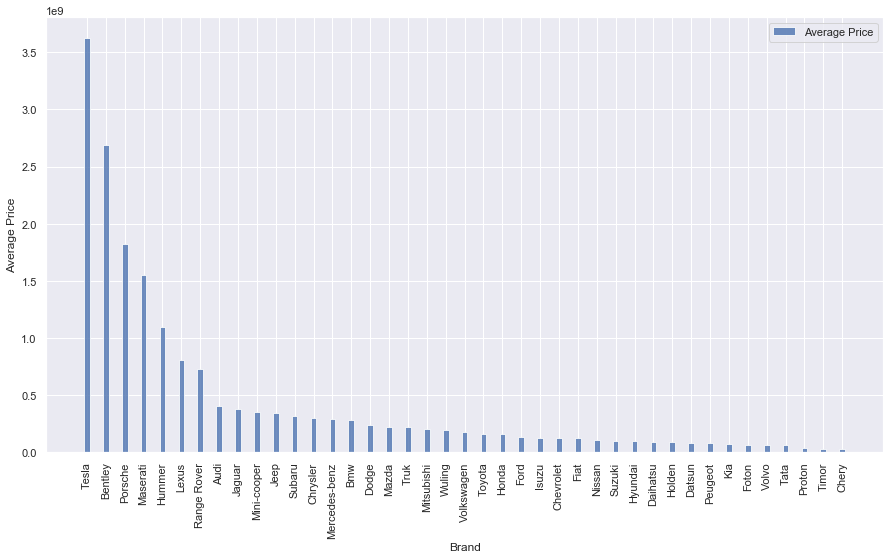

In [155]:
ftmean('Brand', 0, None)

In [144]:
listbrand = list(df2['Brand'].unique())
premium = []
high = []
medium = []
normal = []
low = []

for i in listbrand:
    if df2['Harga'][df2['Brand']== i].mean()/1000000000 > 2.5:
        premium.append(i)
    elif 1 < df2['Harga'][df2['Brand']== i].mean()/1000000000 <= 2.5:
        high.append(i)
    elif 0.3 < df2['Harga'][df2['Brand']== i].mean()/1000000000 <= 1:
        medium.append(i)
    elif 0.2 < df2['Harga'][df2['Brand']== i].mean()/1000000000 <= 0.3:
        normal.append(i)
    else:
        low.append(i)
        
print('5', premium)
print('4', high)
print('3', medium)
print('2', normal)
print('1', low)

5 ['Bentley', 'Tesla']
4 ['Porsche', 'Hummer', 'Maserati']
3 ['Lexus', 'Jeep', 'Audi', 'Mini-cooper', 'Jaguar', 'Subaru', 'Range Rover']
2 ['Mitsubishi', 'Truk', 'Mazda', 'Bmw', 'Mercedes-benz', 'Dodge', 'Chrysler']
1 ['Suzuki', 'Kia', 'Honda', 'Toyota', 'Nissan', 'Daihatsu', 'Holden', 'Ford', 'Wuling', 'Volkswagen', 'Chevrolet', 'Hyundai', 'Isuzu', 'Datsun', 'Timor', 'Peugeot', 'Chery', 'Proton', 'Fiat', 'Tata', 'Foton', 'Volvo']


In [145]:
def brand(i):
    if i in premium:
        return 5
    elif i in high:
        return 4
    elif i in medium:
        return 3
    elif i in normal:
        return 2
    else:
        return 1

In [146]:
df2.loc[:,'classBrand'] = df2['Brand'].apply(brand)
df2

,ID,Brand,Harga,Model,Tahun,Transmisi,Tipe bahan bakar,Warna,Tipe body,URL,classCC,classJarak,classPenggerak,classBody,classBrand
0,536111333,Lexus,450000000.0,RX,2012,Automatic,Bensin,Hitam,SUV,https://www.olx.co.id/iklan/lexus-rx-270-facel...,4,62500.0,2WD,medium,3
1,534289064,Suzuki,149000000.0,Ertiga,2018,Manual,Bensin,Putih,MPV,https://www.olx.co.id/iklan/ertiga-new-gl-mt-2...,2,17500.0,2WD,medium,1
2,530738417,Lexus,412000000.0,RX,2012,Automatic,Bensin,Hitam,MPV,https://www.olx.co.id/iklan/lexus-rx270-hongko...,4,52500.0,2WD,medium,3
3,536885897,Kia,33500000.0,Carens I,2002,Manual,Bensin,Coklat,MPV,https://www.olx.co.id/iklan/kia-carens-1-ls-ma...,3,112500.0,2WD,medium,1
4,536881871,Honda,46000000.0,Civic,1994,Manual,Bensin,Kuning,Sedan,https://www.olx.co.id/iklan/honda-civic-genio-...,3,22500.0,2WD,small,1
5,536885636,Honda,190000000.0,Jazz,2015,Manual,Bensin,Putih,Compact & City Car,https://www.olx.co.id/iklan/honda-jazz-rs-mt-2...,2,37500.0,2WD,small,1
6,536885602,Kia,110000000.0,Rio,2012,Automatic,Bensin,Putih,Hatchback,https://www.olx.co.id/iklan/jual-all-new-kia-r...,2,102500.0,2WD,small,1
7,536885549,Toyota,43000000.0,Kijang,1996,Manual,Bensin,Hijau,Minibus,https://www.olx.co.id/iklan/kijang-grand-extra...,3,305000.0,2WD,medium,1
8,536885492,Toyota,193500000.0,Innova,2013,Manual,Diesel,Putih,MPV,https://www.olx.co.id/iklan/dijual-cepat-innov...,3,132500.0,2WD,medium,1
9,536885471,Toyota,50000000.0,Corolla,1995,Manual,Bensin,Hitam,Sedan,https://www.olx.co.id/iklan/toyota-corolla-gre...,2,182500.0,2WD,small,1


In [147]:
df2dummy = pd.get_dummies(df2[['Transmisi', 'classBody', 'classPenggerak', 'Tipe bahan bakar']])
df2dummy

,Transmisi_Automatic,Transmisi_Manual,classBody_big,classBody_medium,classBody_small,classBody_truk,classPenggerak_2WD,classPenggerak_4WD,Tipe bahan bakar_Bensin,Tipe bahan bakar_Diesel,Tipe bahan bakar_Hybrid,Tipe bahan bakar_Listrik
0,1,0,0,1,0,0,1,0,1,0,0,0
1,0,1,0,1,0,0,1,0,1,0,0,0
2,1,0,0,1,0,0,1,0,1,0,0,0
3,0,1,0,1,0,0,1,0,1,0,0,0
4,0,1,0,0,1,0,1,0,1,0,0,0
5,0,1,0,0,1,0,1,0,1,0,0,0
6,1,0,0,0,1,0,1,0,1,0,0,0
7,0,1,0,1,0,0,1,0,1,0,0,0
8,0,1,0,1,0,0,1,0,0,1,0,0
9,0,1,0,0,1,0,1,0,1,0,0,0


In [148]:
print(df2.columns)

dfML = pd.concat([df2[['Harga','Tahun', 'classCC', 'classJarak', 'classBrand']], df2dummy], axis=1)

dfML

Index(['ID', 'Brand', 'Harga', 'Model', 'Tahun', 'Transmisi',
       'Tipe bahan bakar', 'Warna', 'Tipe body', 'URL', 'classCC',
       'classJarak', 'classPenggerak', 'classBody', 'classBrand'],
      dtype='object')


,Harga,Tahun,classCC,classJarak,classBrand,Transmisi_Automatic,Transmisi_Manual,classBody_big,classBody_medium,classBody_small,classBody_truk,classPenggerak_2WD,classPenggerak_4WD,Tipe bahan bakar_Bensin,Tipe bahan bakar_Diesel,Tipe bahan bakar_Hybrid,Tipe bahan bakar_Listrik
0,450000000.0,2012,4,62500.0,3,1,0,0,1,0,0,1,0,1,0,0,0
1,149000000.0,2018,2,17500.0,1,0,1,0,1,0,0,1,0,1,0,0,0
2,412000000.0,2012,4,52500.0,3,1,0,0,1,0,0,1,0,1,0,0,0
3,33500000.0,2002,3,112500.0,1,0,1,0,1,0,0,1,0,1,0,0,0
4,46000000.0,1994,3,22500.0,1,0,1,0,0,1,0,1,0,1,0,0,0
5,190000000.0,2015,2,37500.0,1,0,1,0,0,1,0,1,0,1,0,0,0
6,110000000.0,2012,2,102500.0,1,1,0,0,0,1,0,1,0,1,0,0,0
7,43000000.0,1996,3,305000.0,1,0,1,0,1,0,0,1,0,1,0,0,0
8,193500000.0,2013,3,132500.0,1,0,1,0,1,0,0,1,0,0,1,0,0
9,50000000.0,1995,2,182500.0,1,0,1,0,0,1,0,1,0,1,0,0,0


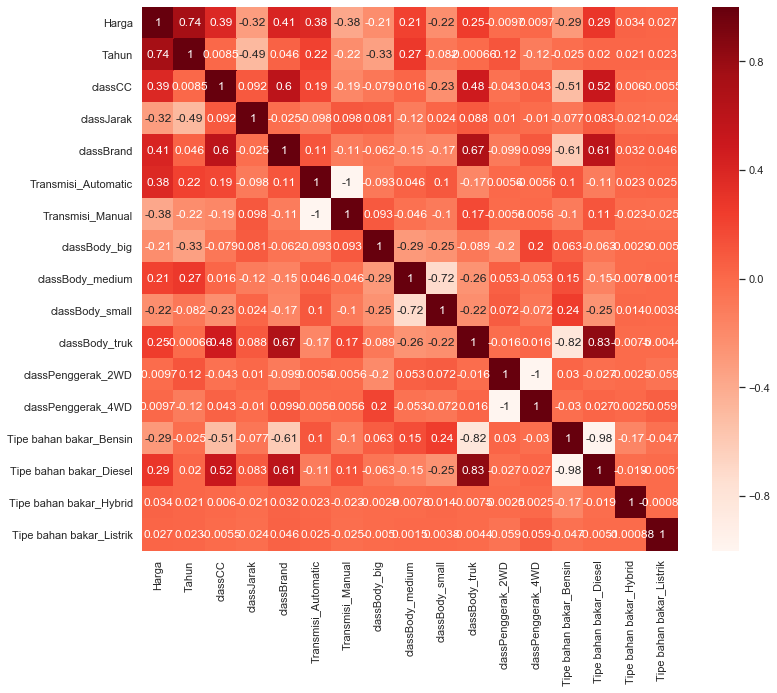

In [149]:
import seaborn as sns
sns.set()

plt.figure(figsize=(12,10))
corr = dfML.corr(method='spearman')
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [150]:
from sklearn.model_selection import train_test_split

X = dfML.drop('Harga', axis=1).copy()
y = dfML['Harga'].copy()

#split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1 , random_state=2)


In [151]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor



# algorithm scoring with kFold 5 (80% training, 20% test)
modelETR = ExtraTreesRegressor(n_estimators=90, random_state=100, max_features=11, max_depth=10, max_leaf_nodes=500)
modelRFR = RandomForestRegressor(n_estimators=100, random_state=100, max_features=7, max_depth=10, max_leaf_nodes=900)
modelKNR = KNeighborsRegressor(n_neighbors=10)
modelDTR = DecisionTreeRegressor(max_depth=None, min_samples_split=2, random_state=100)
modelGBR = GradientBoostingRegressor(learning_rate=0.2, random_state=200, max_features=14)


algorithm = [modelETR, modelRFR]

for i in range(len(algorithm)):
    crossvalscore = cross_val_score(algorithm[i], X, y, cv= 5, scoring='r2')
    print(str(algorithm[i])[0:str(algorithm[i]).find('(')],'=', crossvalscore*100, round(crossvalscore.mean()*100,2),'%')

    
    
# ExtraTreesRegressor = [87.64754339 79.11948206 83.16554556 85.5493403  87.91184771] 84.69 %
# RandomForestRegressor = [84.03374674 81.85010185 80.69496403 81.33894825 84.23108571] 82.97 % 

ExtraTreesRegressor = [87.72324934 79.5553249  83.13373982 85.32720422 87.69273913] 84.69 %
RandomForestRegressor = [84.94322462 81.93768505 80.79599295 81.47790511 85.71769089] 82.97 %


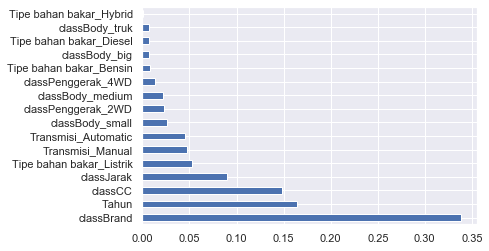

Base on X_test, y_Test : 94.72678848573045 %
Base on X, y (all data tested) : 94.46973643178708 %
58000000.0
[55251293.53238758]


In [152]:
modelETR.fit(X_train,y_train)
# print(sorted(modelETR.feature_importances_, reverse=True)) 

# plot graph of feature importances for better visualization
feat_importances = pd.Series(modelETR.feature_importances_, index=X.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

print('Base on X_test, y_Test :', modelETR.score(X_test,y_test)*100, '%')
print('Base on X, y (all data tested) :', modelETR.score(X,y)*100, '%')
print(y_test.iloc[1])
print(modelETR.predict([X_test.iloc[1]]))

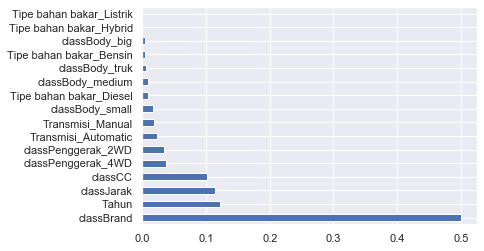

Base on X_train, y_train : 77.35807735675948 %
Base on X, y (all data tested) : 80.07467419991525 %
58000000.0
[50799134.38670506]


In [153]:
# RandomForestRegressor

modelRFR.fit(X_test, y_test)

feat_importances = pd.Series(modelRFR.feature_importances_, index=X.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

print('Base on X_train, y_train :', modelRFR.score(X_train,y_train)*100, '%')
print('Base on X, y (all data tested) :', modelRFR.score(X,y)*100, '%')
print(y_test.iloc[1])
print(modelRFR.predict([X_test.iloc[1]]))